# 데이터 시각화 및 인사이트 도출

### 데이터 불러오기

In [104]:
import pandas as pd

# 시각화 라이브러리 추가
import matplotlib.pyplot as plt

# 한글처리 라이브러리
from matplotlib import font_manager, rc

# 시스템 OS 확인을 위한 라이브러리
import platform

In [105]:
# 운영체제별 폰트 정의하기
if platform.system() == "Windows": 
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)
    
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")

else : print ("Check your os system")

In [106]:
# kto_total.xlsx 파일 불러온 후 조회

df = pd.read_excel("C:/Sources/StudyConda/files/kto_total.xlsx")
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [107]:
# 중국 국적에 대한 데이터를 필터링해서 조회
condition = (df["국적"] == "중국")
condition

0       False
1       False
2       False
3       False
4       False
        ...  
6955    False
6956    False
6957    False
6958    False
6959    False
Name: 국적, Length: 6960, dtype: bool

In [108]:
# 중국 국적에 대한 필터링 결과 확인하기
df_filter = df[condition]

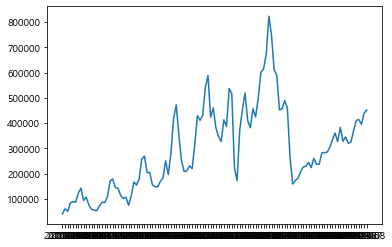

In [109]:
#중국 관광객에 대한 년울별 추이 시각화 분석 (시계열그래프)
plt.plot(df_filter["기준년월"],df_filter["관광"])
plt.show()

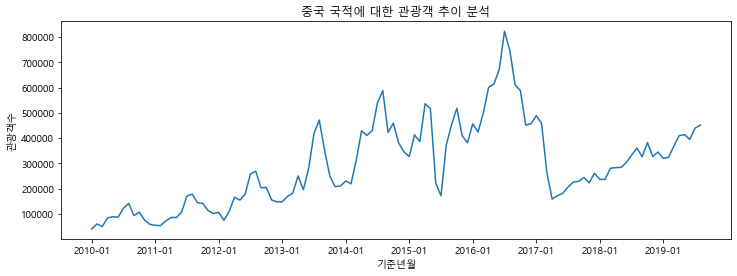

In [110]:
# 그래프 꾸미기
# 그래프 크기 조절
plt.figure(figsize = (12,4))

#그래프에 데이터 넣기
plt.plot(df_filter["기준년월"],df_filter["관광"])

#그래프 제목 넣기
plt.title("중국 국적에 대한 관광객 추이 분석")

# x축에 대한 라벨 추가
plt.xlabel("기준년월")

# y축에 대한 라벨 추가
plt.ylabel("관광객수")

# x축에 대한 눈금을 조정
plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01","2014-01",
            "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"])
plt.show()

In [111]:
# 관광객 전체비율이 가장 높은 5개 국가 조회
df.sort_values("전체비율(%)", ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.7,58.6
4757,중국,747818,4352,270,35523,85808,873771,2016-08,아시아,85.6,57.0
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
3317,중국,588181,8340,173,23091,137898,757683,2014-08,아시아,77.6,54.3
4337,중국,456636,3723,140,4383,57099,521981,2016-01,아시아,87.5,52.8


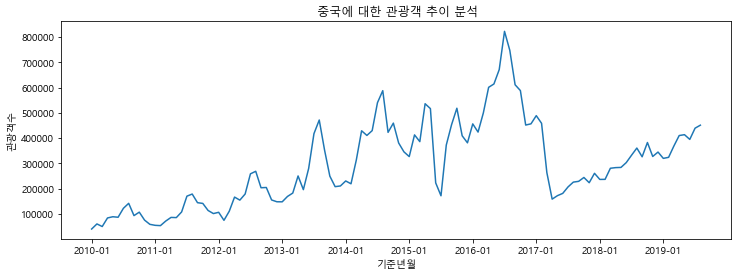

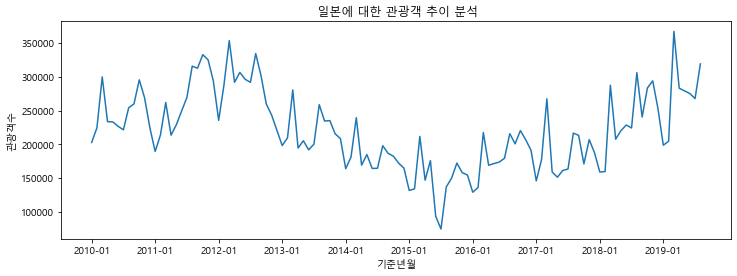

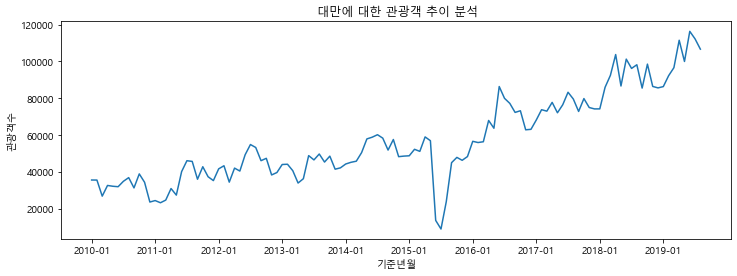

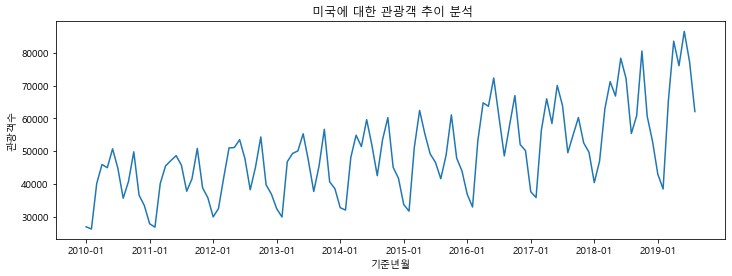

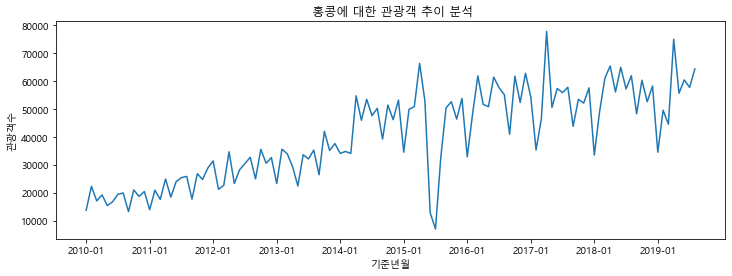

In [113]:
# 중국, 일본, 대만, 미국, 홍콩 각각에 대한 기준년월별 관광객 추이 분석

list1 =["중국","일본","대만","미국","홍콩"] 
for i in list1 :
    condition = (df["국적"] == i)
    df_filter = df[condition]
    # 그래프 꾸미기
    # 그래프 크기 조절
    plt.figure(figsize = (12,4))

    #그래프에 데이터 넣기
    plt.plot(df_filter["기준년월"],df_filter["관광"])

    #그래프 제목 넣기
    plt.title(" {}에 대한 관광객 추이 분석".format(i))

    # x축에 대한 라벨 추가
    plt.xlabel("기준년월")

    # y축에 대한 라벨 추가
    plt.ylabel("관광객수")

    # x축에 대한 눈금을 조정
    plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01","2014-01",
                "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"])
    plt.show()

In [ ]:
# 히트맵 ": 전체 시계열 데이터에 대한 이슈를 한눈에 보기
# 변수 : 3개가 필요

In [179]:
# 년도와 월만 조회
# 기준년월에서 년도만 추출
# 기준년월에서 월만 추철

df["년도"] = df["기준년월"].str.slice(0,4)
df["월"] = df["기준년월"].str.slice(5,7)


df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [180]:
# 히트맵 그리는 순서
# 1. 피봇으로 데이터 집계
# 2. 피붓 결과를 히트맵에 적용


In [181]:
# 1. 피붓 데이터 만들기

df_pivot = df.pivot_table(values = "관광", index = "년도", columns = "월")
df_pivot


월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,6680.300000,7442.083333,9090.700000,9054.950000,8755.666667,8674.566667,9018.083333,9670.116667,9112.316667,10970.733333,9305.400000,8339.816667
2011,6666.633333,7182.033333,8987.966667,9066.233333,8929.533333,9773.066667,11131.766667,11969.050000,11249.500000,12803.266667,11287.566667,11005.166667
2012,9283.466667,9572.450000,11855.433333,12892.816667,12214.800000,12590.016667,13531.883333,14245.833333,12772.583333,13218.150000,11061.366667,11041.500000
2013,9512.633333,10139.733333,12613.300000,12120.283333,10973.533333,12672.616667,14540.600000,16442.833333,14221.233333,13963.766667,11841.300000,12219.633333
2014,10672.250000,10725.533333,14432.116667,16361.916667,15854.700000,15769.616667,17165.083333,18070.066667,15662.133333,17613.400000,15002.833333,14795.016667
2015,12054.250000,13585.633333,15974.883333,18548.400000,17678.833333,8632.100000,6990.500000,12180.133333,15131.233333,17935.883333,15194.116667,15018.850000
2016,14417.733333,14166.583333,18724.416667,20236.683333,20044.866667,21285.266667,23424.933333,21875.233333,19990.833333,21728.200000,17941.183333,18379.483333
2017,16303.716667,15882.466667,16173.150000,14244.483333,12309.833333,12919.683333,13039.816667,13620.433333,13990.250000,14998.016667,14679.083333,15432.300000
2018,12378.866667,13174.616667,18092.366667,18189.216667,16524.150000,17597.583333,17176.866667,18345.183333,16888.766667,21153.350000,18845.150000,18539.683333


In [182]:
#2. 히트맵 그리기
# 히트맵은 시본 라이브러리를 함께 사용해야 한다.
import seaborn as sns

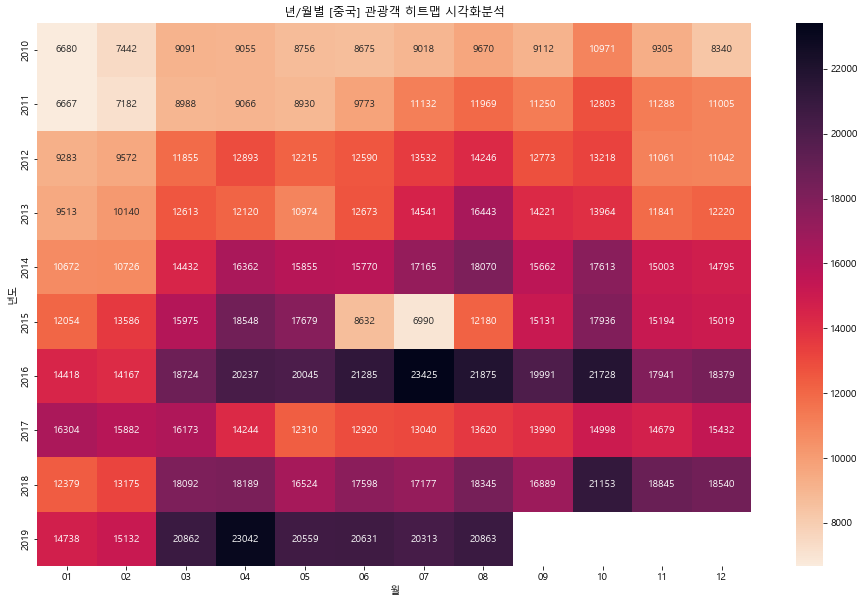

In [183]:
# 그래프 크기 설정
plt.figure(figsize =  (16,10))

# 피붓 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt=".0f", cmap="rocket_r")

#타이틀 넣기
plt.title("년/월별 [중국] 관광객 히트맵 시각화분석")

#보여주기
plt.show()

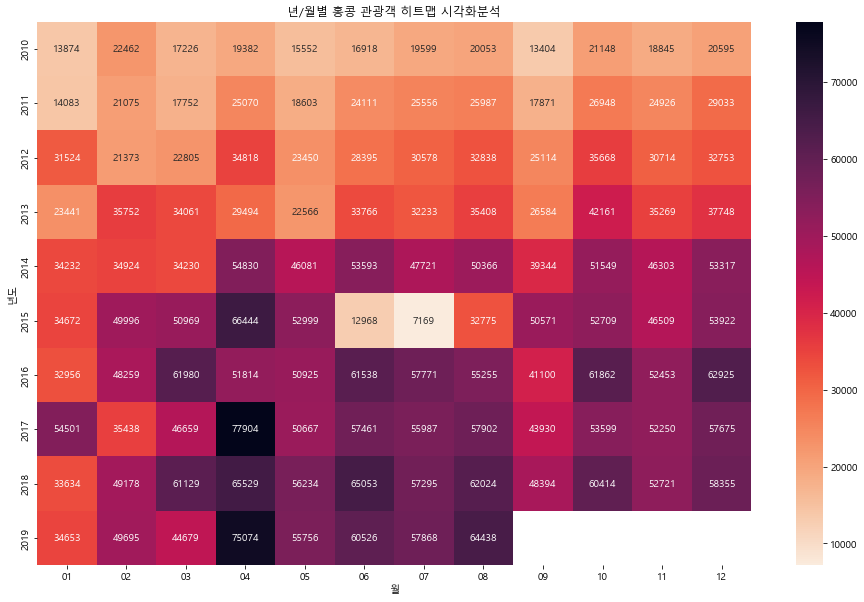

In [184]:
#중국, 일본, 대만, 미국, 홍콩 관광객 히트맵 만들어보기
list1 =["중국","일본","대만","미국","홍콩"] 
for i in list1 :
    condition = (df["국적"] == i)
    df_filter = df[condition]    
df_pivot = df_filter.pivot_table(values = "관광", index = "년도", columns = "월")    
    
plt.figure(figsize =  (16,10))
sns.heatmap(df_pivot, annot = True, fmt=".0f", cmap="rocket_r")
plt.title("년/월별 {} 관광객 히트맵 시각화분석".format(i))
plt.show()


In [ ]:
# 해석   : 
# 트랜드 : 
# 계절적 : 
# 이벤트 : 